In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
file_name = 'Unemployment Rate by Previous Industry.xls' 

In [3]:
#reads the xls file, started with the 4th row and skips the 7 rows below.
#uses column[0] as header of the data frame
#removes all rows and columns with NULL values

df = (pd.read_excel(file_name,skiprows=3, skipfooter = 7, header = (0)).dropna(how='all').dropna(axis=1,how="all"))

In [4]:
df.head()

,Unnamed: 0,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [5]:
#changing the name of the first column from Unnamed:0 to Period
df.rename(columns={df.columns[0]: 'Period'}, inplace = True)

In [6]:
df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [7]:
df.tail()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
158,3/2020 - 5/2020,7.0,10.8,4.7,10.6,5.8,4.0,3.3,3.8,6.0
159,4/2020 - 6/2020,6.3,11.2,5.2,10.7,6.0,4.1,3.3,4.4,6.2
160,5/2020 - 7/2020,6.7,11.3,5.1,10.8,5.8,3.7,3.1,4.5,6.3
161,6/2020 - 8/2020,6.4,11.1,5.0,10.9,5.7,3.8,3.2,5.2,6.4
162,7/2020 - 9/2020 #,6.5,10.9,5.2,11.7,5.9,4.0,3.2,3.8,6.7


In [8]:
df = df.replace(["##",'#'],np.nan)

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [ ]:
#exported the file to HTML

profile.to_file("Unemployment_GroupIndustry.html")

#according to the correlation map and scatter map, almost all of the columns are highly correlated with each other except 
#for the 'Other Industries' column. This is due to the NaN values in the said column.  

#### Divided the table to two parts: (1) Yearly Employment Rates and (2)Quarterly Per Year Employment Rates

In [9]:
##getting the yearly employment rates from 2008 - 2019

yr_df = df.iloc[0:12,:]

In [10]:
yr_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [12]:
## getting the quarterly rates per year from 1st Quarter of 2008 to 3rd Quarter of 2020.

qr_df = df.iloc[12:,:]

In [13]:
qr_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
12,1/2008 - 3/2008,3.9,7.5,2.4,4.6,3.0,2.5,1.3,NaN,3.2
13,2/2008 - 4/2008,4.1,8.3,2.5,4.3,3.0,2.5,1.3,NaN,3.3
14,3/2008 - 5/2008,4.5,7.2,2.5,4.8,2.9,2.4,1.4,NaN,3.3
15,4/2008 - 6/2008,4.3,7.6,2.5,4.5,2.7,2.3,1.1,NaN,3.3
16,5/2008 - 7/2008,4.2,6.8,2.2,4.6,2.3,2.3,1.2,NaN,3.4


### HKSAR EVENTS: What are the events(years) in HKSAR that has the highest impact on the  unemployment rate ? Using group of industry data set

In [ ]:
# Using the YEARLY unemployment rates, map it into a bar graph. 

ax = yr_df.plot.bar(x='Period', figsize=(18,10))

In [ ]:
yr_df.columns

In [ ]:
# Using the YEARLY unemployment rates, map it into a bar graph. 

ax = yr_df.sort_values('All industries ', ascending = False).plot.bar(x='Period', figsize=(18,10))

In [ ]:
#Using the QUARTERLY per year employment rates, map into a bar graph.  

ax = qr_df.plot.bar(x='Period', figsize=(18,10))

In [ ]:
ax = qr_df.sort_values('All industries ', ascending = False).plot.bar(x='Period', figsize=(18,10))

## Cluster k-Mean Functions

In [52]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [53]:
def KMeansElbow (r, data):
    distortions = []
    K = range(1,r)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [63]:
def KMeansModel (n, data):
    kmeanModel = KMeans(n_clusters=n)
    kmeanModel.fit(data)
    data['k_means']=kmeanModel.predict(data)
    return kmeanModel



In [55]:
def KMeansPlot (data, x, y, c_d):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(data[x], data[y], c=data[c_d])
    axes[1].scatter(data[x], data[y], c=data['k_means'], cmap=plt.cm.Set1)

In [56]:
def KMeansCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['k_means'] == cond ] [column])
    return cluster

In [ ]:
#KMeansElbow (8, peak1_df)
##KMeansModel(4, peak1_df)
##KMeansPlot(peak1_df, 'Manufacturing ', 'Construction ','Period')
##KMeansCluster (peak1_df, 0, 'Period')

### Evaluate the data through clustering the YEARS using quarterly data frame 

In [ ]:
for i in range (2008, 2021):
    yearInStr = str(i)
    qr_df['Period'] = qr_df.Period.str.replace(r'(^.*{}.*$)'.format(yearInStr), '{}'.format(yearInStr))

In [ ]:
qr_df.fillna(0, inplace = True)

In [ ]:
qr_df["Period"] = qr_df.Period.astype(float)

In [ ]:
KMeansElbow (11, qr_df)

In [ ]:
#x = KMeansModel(5, qr_df)

kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(qr_df)

In [ ]:
qr_df['k_means']=kmeanModel.predict(qr_df)

In [ ]:
qr_df.columns

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(qr_df['Manufacturing '], qr_df['Construction '],     
                c=qr_df['All industries '])
axes[0].scatter(qr_df['Import/export trade and wholesale '], 
                qr_df['Retail, accommodation and food services '],c=qr_df['All industries '])
axes[0].scatter(qr_df['Transportation, storage, postal and courier services, information and communications '], 
                qr_df['Financing, insurance, real estate, professional and business services '],c=qr_df['All industries '])
axes[0].scatter(qr_df['Financing, insurance, real estate, professional and business services '],
                qr_df['Public administration, social and personal services '], c=qr_df['All industries '])

axes[1].scatter(qr_df['Manufacturing '], qr_df['Construction '], c=qr_df['k_means'], cmap=plt.cm.Set1) 
axes[1].scatter(qr_df['Import/export trade and wholesale '], 
                qr_df['Retail, accommodation and food services '], c=qr_df['k_means'], cmap=plt.cm.Set1)
axes[1].scatter(qr_df['Transportation, storage, postal and courier services, information and communications '], 
                qr_df['Financing, insurance, real estate, professional and business services '], 
                c=qr_df['k_means'], cmap=plt.cm.Set1)
axes[1].scatter(qr_df['Financing, insurance, real estate, professional and business services '],
                qr_df['Public administration, social and personal services '],
                c=qr_df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [ ]:
#col = ['Period', 'All industries ']
#KMeansCluster (qr_df, 0, col).drop_duplicates()

KMeansCluster (qr_df, 0, 'Period').drop_duplicates()

In [ ]:
KMeansCluster (qr_df, 1, 'Period').drop_duplicates()

In [ ]:
KMeansCluster (qr_df, 2, 'Period').drop_duplicates()

In [ ]:
KMeansCluster (qr_df, 3, 'Period').drop_duplicates()

In [ ]:
KMeansCluster (qr_df, 4, 'Period').drop_duplicates()

# Pandemic vs Protests

## Pandemic Years 2009(Bird Flu) and 2020 (Covid-19)

In [109]:
qr1_df = df.iloc[12:,:]
yr1_df = df.iloc[0:12,:]

In [110]:
#qr1_df = int(qr1_df['Period'])
qr1_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
12,1/2008 - 3/2008,3.9,7.5,2.4,4.6,3.0,2.5,1.3,NaN,3.2
13,2/2008 - 4/2008,4.1,8.3,2.5,4.3,3.0,2.5,1.3,NaN,3.3
14,3/2008 - 5/2008,4.5,7.2,2.5,4.8,2.9,2.4,1.4,NaN,3.3
15,4/2008 - 6/2008,4.3,7.6,2.5,4.5,2.7,2.3,1.1,NaN,3.3
16,5/2008 - 7/2008,4.2,6.8,2.2,4.6,2.3,2.3,1.2,NaN,3.4


In [111]:
yr1_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [112]:
#get the pandemic years data 

search_values = ['2009','2020']

pandemic_df = qr1_df[qr1_df.Period.str.contains('|'.join(search_values),case=False)]

In [113]:
pandemic_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
22,11/2008 - 1/2009,5.8,7.3,3.9,6.0,4.4,2.9,1.8,3.0,4.3
23,12/2008 - 2/2009,6.0,9.9,4.3,6.1,5.1,3.2,1.9,2.7,4.7
24,1/2009 - 3/2009,6.2,11.3,4.6,6.7,5.7,3.6,1.8,NaN,5.1
25,2/2009 - 4/2009,7.0,12.8,4.7,7.1,5.4,3.9,1.7,NaN,5.4
26,3/2009 - 5/2009,6.8,12.2,4.8,7.4,5.2,4.1,1.7,2.1,5.4


## Protests Years 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019

In [ ]:
search_values = ['2008','2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019' ]

protest_df = qr1_df[qr1_df.Period.str.contains('|'.join(search_values),case=False)]

In [ ]:
protest_df.head()

### check the pandemic year and protest years that has the highest unemployment rate

In [ ]:
ax = pandemic_df.sort_values('All industries ', ascending = False).plot.bar(x='Period', figsize=(18,10))

In [ ]:
ax = protest_df.sort_values('All industries ', ascending = False).plot.bar(x='Period', figsize=(18,10))

### Using by year data set in protest years

In [ ]:
protest_yrdf = yr1_df.drop(yr1_df[yr1_df['Period']== 2009].index)

#df = df.drop(df[<some boolean condition>].index) 

In [ ]:
protest_yrdf.head()

In [ ]:
ax = protest_yrdf.sort_values('All industries ', ascending = False).plot.bar(x='Period', figsize=(18,10))

## Group Industries

In [27]:
yr_df_T = yr_df.T
yr_df_T

,0,1,2,3,4,5,6,7,8,9,10,11
Period,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Manufacturing,4.5,6.2,4.7,4,4,3.1,3.2,3.4,3.5,2.6,3.4,3.1
Construction,6.7,10,6.9,5.6,4.9,5.1,5,4,4.1,4.4,4.6,5.1
Import/export trade and wholesale,2.6,4.6,4.1,3.1,2.8,3,2.8,2.7,2.9,2.8,2.3,2.4
"Retail, accommodation and food services",5,7,5.8,4.6,4.4,4.7,4.4,4.7,5.2,4.6,3.9,4.4
"Transportation, storage, postal and courier services, information and communications",3,4.8,3.8,3,2.7,2.7,2.7,2.7,2.8,2.9,2.3,2.6
"Financing, insurance, real estate, professional and business services",2.4,3.8,3.4,2.6,2.6,2.5,2.3,2.4,2.7,2.2,2.1,2.1
"Public administration, social and personal services",1.3,2.1,1.7,1.5,1.4,1.5,1.6,1.7,1.6,1.4,1.2,1.2
Other industries,1.3,2.2,1.9,1.6,1.2,1.9,NaN,2.4,1.3,1.7,1.1,1.7
All industries,3.5,5.3,4.3,3.4,3.3,3.4,3.3,3.3,3.4,3.1,2.8,2.9


In [28]:
yr_df_T.columns = yr_df_T.iloc[0]

In [29]:
yr_df_T.drop(yr_df_T.index[0], inplace = True)

In [41]:
yr_df_T['mean'] = yr_df_T.mean(axis=1)

In [42]:
yr_df_T.head()

Period,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean
Manufacturing,4.5,6.2,4.7,4,4,3.1,3.2,3.4,3.5,2.6,3.4,3.1,3.808333
Construction,6.7,10,6.9,5.6,4.9,5.1,5,4,4.1,4.4,4.6,5.1,5.533333
Import/export trade and wholesale,2.6,4.6,4.1,3.1,2.8,3,2.8,2.7,2.9,2.8,2.3,2.4,3.008333
"Retail, accommodation and food services",5,7,5.8,4.6,4.4,4.7,4.4,4.7,5.2,4.6,3.9,4.4,4.891667
"Transportation, storage, postal and courier services, information and communications",3,4.8,3.8,3,2.7,2.7,2.7,2.7,2.8,2.9,2.3,2.6,3.000000


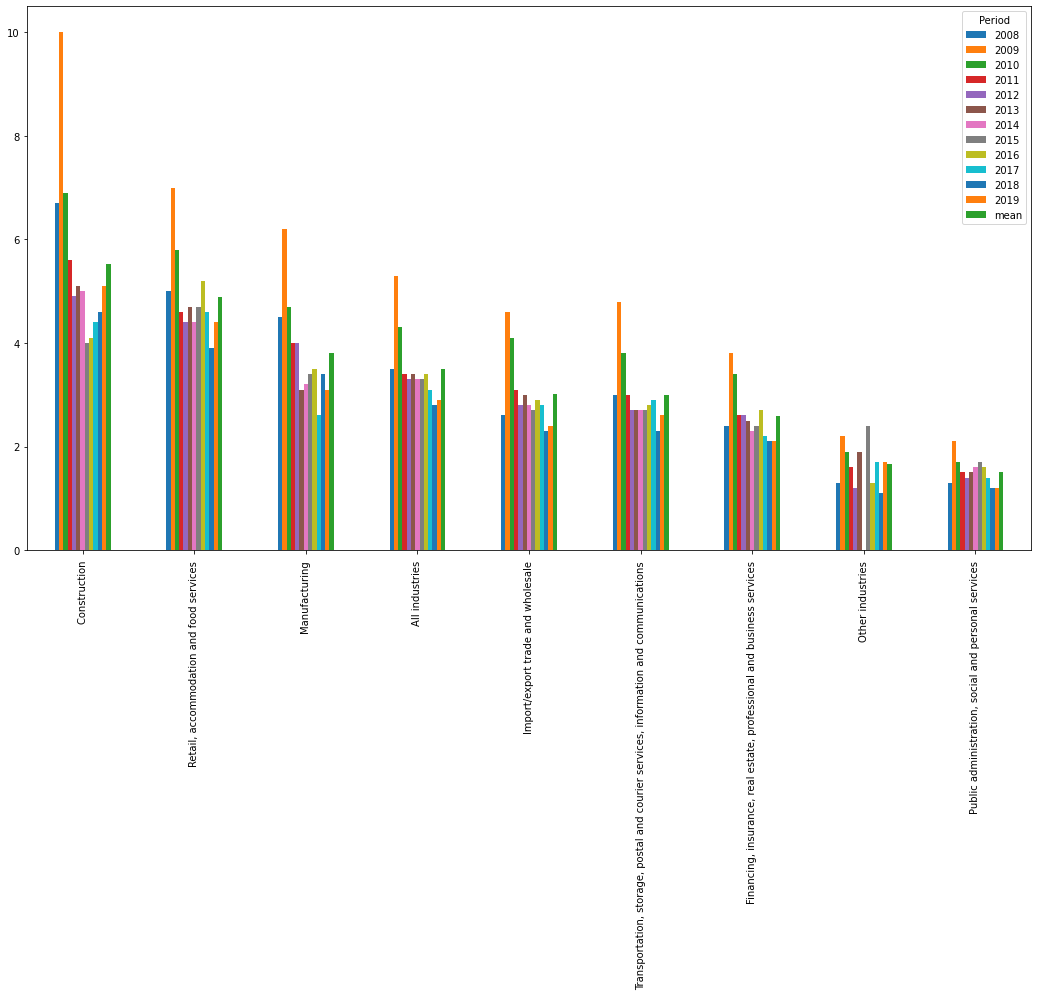

In [43]:
ax = yr_df_T.sort_values('mean', ascending = False).plot.bar(figsize=(18,10))

In [16]:
qr2_df = df.iloc[12:,:]
yr2_df = df.iloc[0:12,:]

In [17]:
qr2_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
12,1/2008 - 3/2008,3.9,7.5,2.4,4.6,3.0,2.5,1.3,NaN,3.2
13,2/2008 - 4/2008,4.1,8.3,2.5,4.3,3.0,2.5,1.3,NaN,3.3
14,3/2008 - 5/2008,4.5,7.2,2.5,4.8,2.9,2.4,1.4,NaN,3.3
15,4/2008 - 6/2008,4.3,7.6,2.5,4.5,2.7,2.3,1.1,NaN,3.3
16,5/2008 - 7/2008,4.2,6.8,2.2,4.6,2.3,2.3,1.2,NaN,3.4


In [22]:
qr2_df_T = qr2_df.T

In [24]:
qr2_df_T.columns = qr2_df_T.iloc[0]

In [25]:
#qr2_df_T.columns = qr2_df_T.iloc[0]
qr2_df_T.drop(qr2_df_T.index[0], inplace = True)
#qr2_df_T['mean'] = qr2_df_T.mean(axis=1)

In [44]:
qr2_df_T['mean'] = qr2_df_T.mean(axis=1)

In [45]:
qr2_df_T.head()

Period,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020,6/2020 - 8/2020,7/2020 - 9/2020 #,mean
Manufacturing,3.9,4.1,4.5,4.3,4.2,3.9,4.6,4.1,4.7,4.9,...,3.5,4,5.8,6.2,7,6.3,6.7,6.4,6.5,3.919868
Construction,7.5,8.3,7.2,7.6,6.8,6.3,5.5,5.3,5.8,6.1,...,5.7,6.8,8.5,10,10.8,11.2,11.3,11.1,10.9,5.770861
Import/export trade and wholesale,2.4,2.5,2.5,2.5,2.2,2.2,2.5,2.8,3,3.3,...,2.7,2.9,3.6,4.2,4.7,5.2,5.1,5,5.2,3.086093
"Retail, accommodation and food services",4.6,4.3,4.8,4.5,4.6,4.6,5.1,5.4,5.8,5.8,...,5.2,6.1,6.8,9,10.6,10.7,10.8,10.9,11.7,5.144371
"Transportation, storage, postal and courier services, information and communications",3,3,2.9,2.7,2.3,2.4,2.7,3.2,3.3,3.8,...,2.5,2.7,3.3,4.7,5.8,6,5.8,5.7,5.9,3.106623


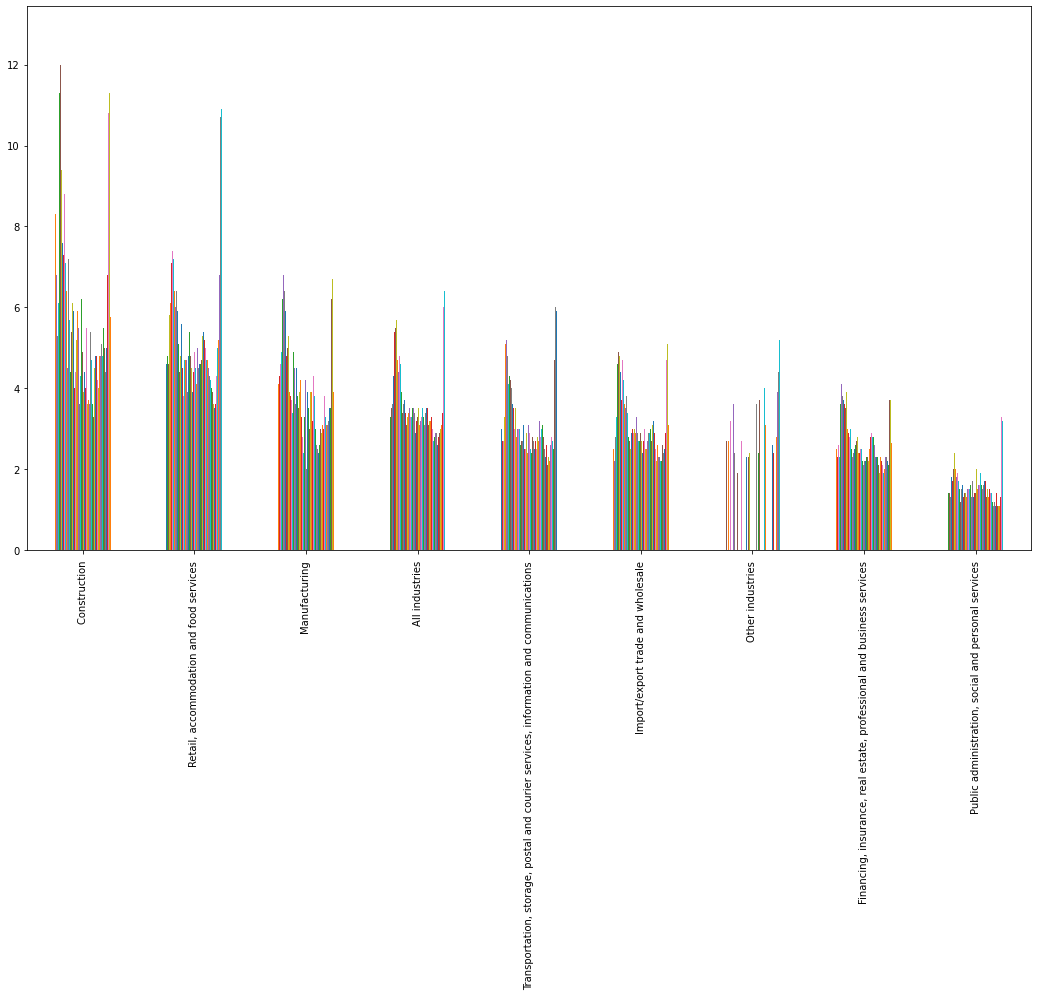

In [47]:
ax = qr2_df_T.sort_values('mean', ascending = False).plot.bar(legend = None, figsize=(18,10))

In [48]:
#KMeansElbow (8, peak1_df)
##KMeansModel(4, peak1_df)
##KMeansPlot(peak1_df, 'Manufacturing ', 'Construction ','Period')
##KMeansCluster (peak1_df, 0, 'Period')

## Cluster industry in ALL years

In [50]:
qr2_df_T.shape

(9, 152)

In [58]:
qr2_df_T.fillna(0, inplace = True)

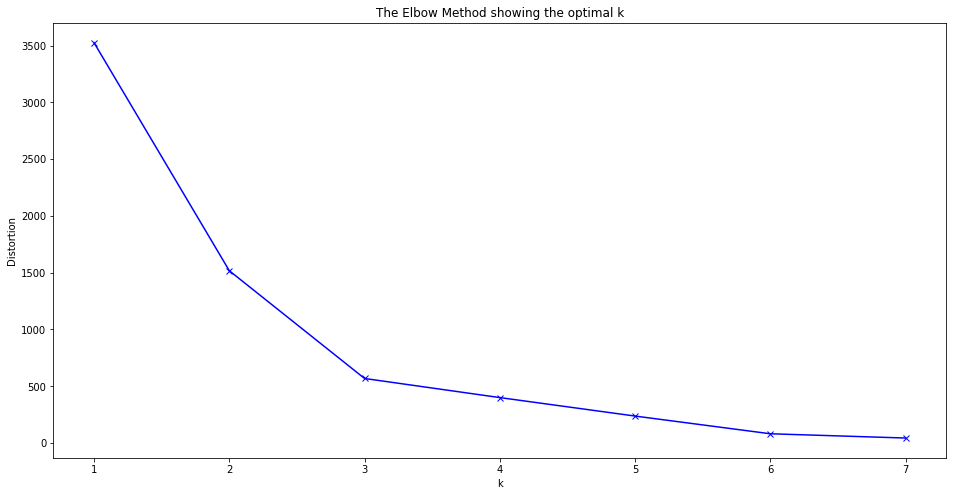

In [59]:
KMeansElbow (8, qr2_df_T)

In [64]:
KMeansModel(4, qr2_df_T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
qr2_df_T.columns

Index(['1/2008 - 3/2008', '2/2008 - 4/2008', '3/2008 - 5/2008',
       '4/2008 - 6/2008', '5/2008 - 7/2008', '6/2008 - 8/2008',
       '7/2008 - 9/2008', '8/2008 - 10/2008', '9/2008 - 11/2008',
       '10/2008 - 12/2008',
       ...
       '12/2019 - 2/2020', '1/2020 - 3/2020', '2/2020 - 4/2020',
       '3/2020 - 5/2020', '4/2020 - 6/2020', '5/2020 - 7/2020',
       '6/2020 - 8/2020', '7/2020 - 9/2020 #', 'mean', 'k_means'],
      dtype='object', name='Period', length=153)

In [67]:
KMeansCluster (qr2_df_T, 0, 'mean')

,mean
Manufacturing,3.919868
Import/export trade and wholesale,3.086093
"Transportation, storage, postal and courier services, information and communications",3.106623
"Financing, insurance, real estate, professional and business services",2.647020
All industries,3.615232


In [68]:
KMeansCluster (qr2_df_T, 1, 'mean')

,mean
"Public administration, social and personal services",1.562914
Other industries,3.046429


In [69]:
KMeansCluster (qr2_df_T, 2, 'mean')

,mean
Construction,5.770861


In [70]:
KMeansCluster (qr2_df_T, 3, 'mean')

,mean
"Retail, accommodation and food services",5.144371


In [88]:
qr2_df_T.columns

Index(['1/2008 - 3/2008', '2/2008 - 4/2008', '3/2008 - 5/2008',
       '4/2008 - 6/2008', '5/2008 - 7/2008', '6/2008 - 8/2008',
       '7/2008 - 9/2008', '8/2008 - 10/2008', '9/2008 - 11/2008',
       '10/2008 - 12/2008',
       ...
       '12/2019 - 2/2020', '1/2020 - 3/2020', '2/2020 - 4/2020',
       '3/2020 - 5/2020', '4/2020 - 6/2020', '5/2020 - 7/2020',
       '6/2020 - 8/2020', '7/2020 - 9/2020 #', 'mean', 'k_means'],
      dtype='object', name='Period', length=153)

## Clustering Pandemic Years 

In [114]:
pandemic_df_T = pandemic_df.T

In [116]:
pandemic_df_T.columns = pandemic_df_T.iloc[0]
pandemic_df_T.drop(pandemic_df_T.index[0], inplace = True)
pandemic_df_T['mean'] = pandemic_df_T.mean(axis=1)

In [117]:
pandemic_df_T.head()

Period,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,...,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020,6/2020 - 8/2020,7/2020 - 9/2020 #,mean
Manufacturing,5.8,6,6.2,7,6.8,6.9,6.6,6.4,6.2,5.7,...,3.5,4,5.8,6.2,7,6.3,6.7,6.4,6.5,5.952174
Construction,7.3,9.9,11.3,12.8,12.2,12,11.3,10.3,9.4,7.9,...,5.7,6.8,8.5,10,10.8,11.2,11.3,11.1,10.9,9.578261
Import/export trade and wholesale,3.9,4.3,4.6,4.7,4.8,4.9,5,5,4.8,4.7,...,2.7,2.9,3.6,4.2,4.7,5.2,5.1,5,5.2,4.395652
"Retail, accommodation and food services",6,6.1,6.7,7.1,7.4,7.3,7.4,7.6,7.5,7.2,...,5.2,6.1,6.8,9,10.6,10.7,10.8,10.9,11.7,7.695652
"Transportation, storage, postal and courier services, information and communications",4.4,5.1,5.7,5.4,5.2,4.9,4.8,4.8,4.3,4.1,...,2.5,2.7,3.3,4.7,5.8,6,5.8,5.7,5.9,4.700000


In [118]:
pandemic_df_T.fillna(0, inplace = True)

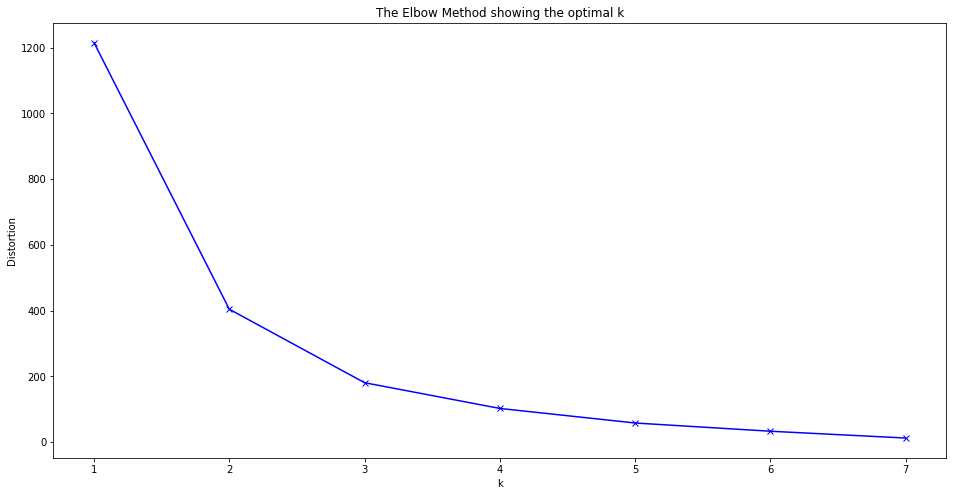

In [120]:
KMeansElbow (8, pandemic_df_T)

In [121]:
#KMeansElbow (8, peak1_df)
##KMeansModel(4, peak1_df)
##KMeansPlot(peak1_df, 'Manufacturing ', 'Construction ','Period')
##KMeansCluster (peak1_df, 0, 'Period')

In [130]:
KMeansModel (4, pandemic_df_T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
KMeansCluster (pandemic_df_T, 0, 'mean')

,mean
Manufacturing,5.952174
Import/export trade and wholesale,4.395652
"Transportation, storage, postal and courier services, information and communications",4.700000
All industries,5.178261


In [132]:
KMeansCluster (pandemic_df_T, 1, 'mean')

,mean
"Financing, insurance, real estate, professional and business services",3.565217
"Public administration, social and personal services",2.234783
Other industries,3.455556


In [133]:
KMeansCluster (pandemic_df_T, 2, 'mean')

,mean
Construction,9.578261


In [134]:
KMeansCluster (pandemic_df_T, 3, 'mean')

,mean
"Retail, accommodation and food services",7.695652
